In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


#create data drame to read data set
df = pd.read_csv('bank.csv', delimiter=';', na_values=['', 'NA', 'none', 'null', 'N/A'])


DATASET DISPLAY & DESCRIPTION


This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

In [56]:
# Display the first few rows
print(df.head())  
print(df.isnull().sum())  # Check the count of missing values in each column

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan  

In [25]:
# Display df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [26]:
# Number of rows & columns
df.shape

(4521, 17)

In [27]:
# Describe dataframe statistical measures like count & mean etc
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [28]:
# Display Qualitatitively the Categories of each Feature

for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


EXPLORATORY DATA ANALYSIS (EDA)

C:\Users\User\AppData\Local\Temp\ipykernel_20160\816567651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Blues')


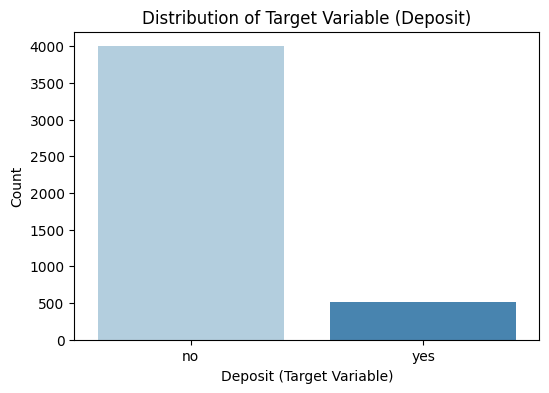

Class distribution in the target variable:
y
no     4000
yes     521
Name: count, dtype: int64
Minority class percentage: 11.52%
Majority class percentage: 88.48%
The dataset is imbalanced


In [29]:
# Check the class distribution of the target variable 'y' for deposit
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='Blues')
plt.title('Distribution of Target Variable (Deposit)')
plt.xlabel('Deposit (Target Variable)')
plt.ylabel('Count')
plt.show()

# Print the count of each class in the target variable
class_counts = df['y'].value_counts()
print(f"Class distribution in the target variable:\n{class_counts}")

# Check if the dataset is balanced or not
total_count = len(df)
minority_class_percentage = (class_counts.min() / total_count) * 100
majority_class_percentage = (class_counts.max() / total_count) * 100

print(f"Minority class percentage: {minority_class_percentage:.2f}%")
print(f"Majority class percentage: {majority_class_percentage:.2f}%")

if minority_class_percentage < 40:
    print("The dataset is imbalanced")
else:
    print("The dataset appears to be balanced")

In [51]:
# Find any missing values
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

if features_na:
    for feature in features_na:
        missing_percentage = np.round(df[feature].isnull().mean() * 100, 4)  # Calculate percentage of missing values
        print(f"{feature}: {missing_percentage}% missing values")
else:
    print("No missing values found")

No missing values found


In [31]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [32]:
# Show number of categories per Feature Quantitatively

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2


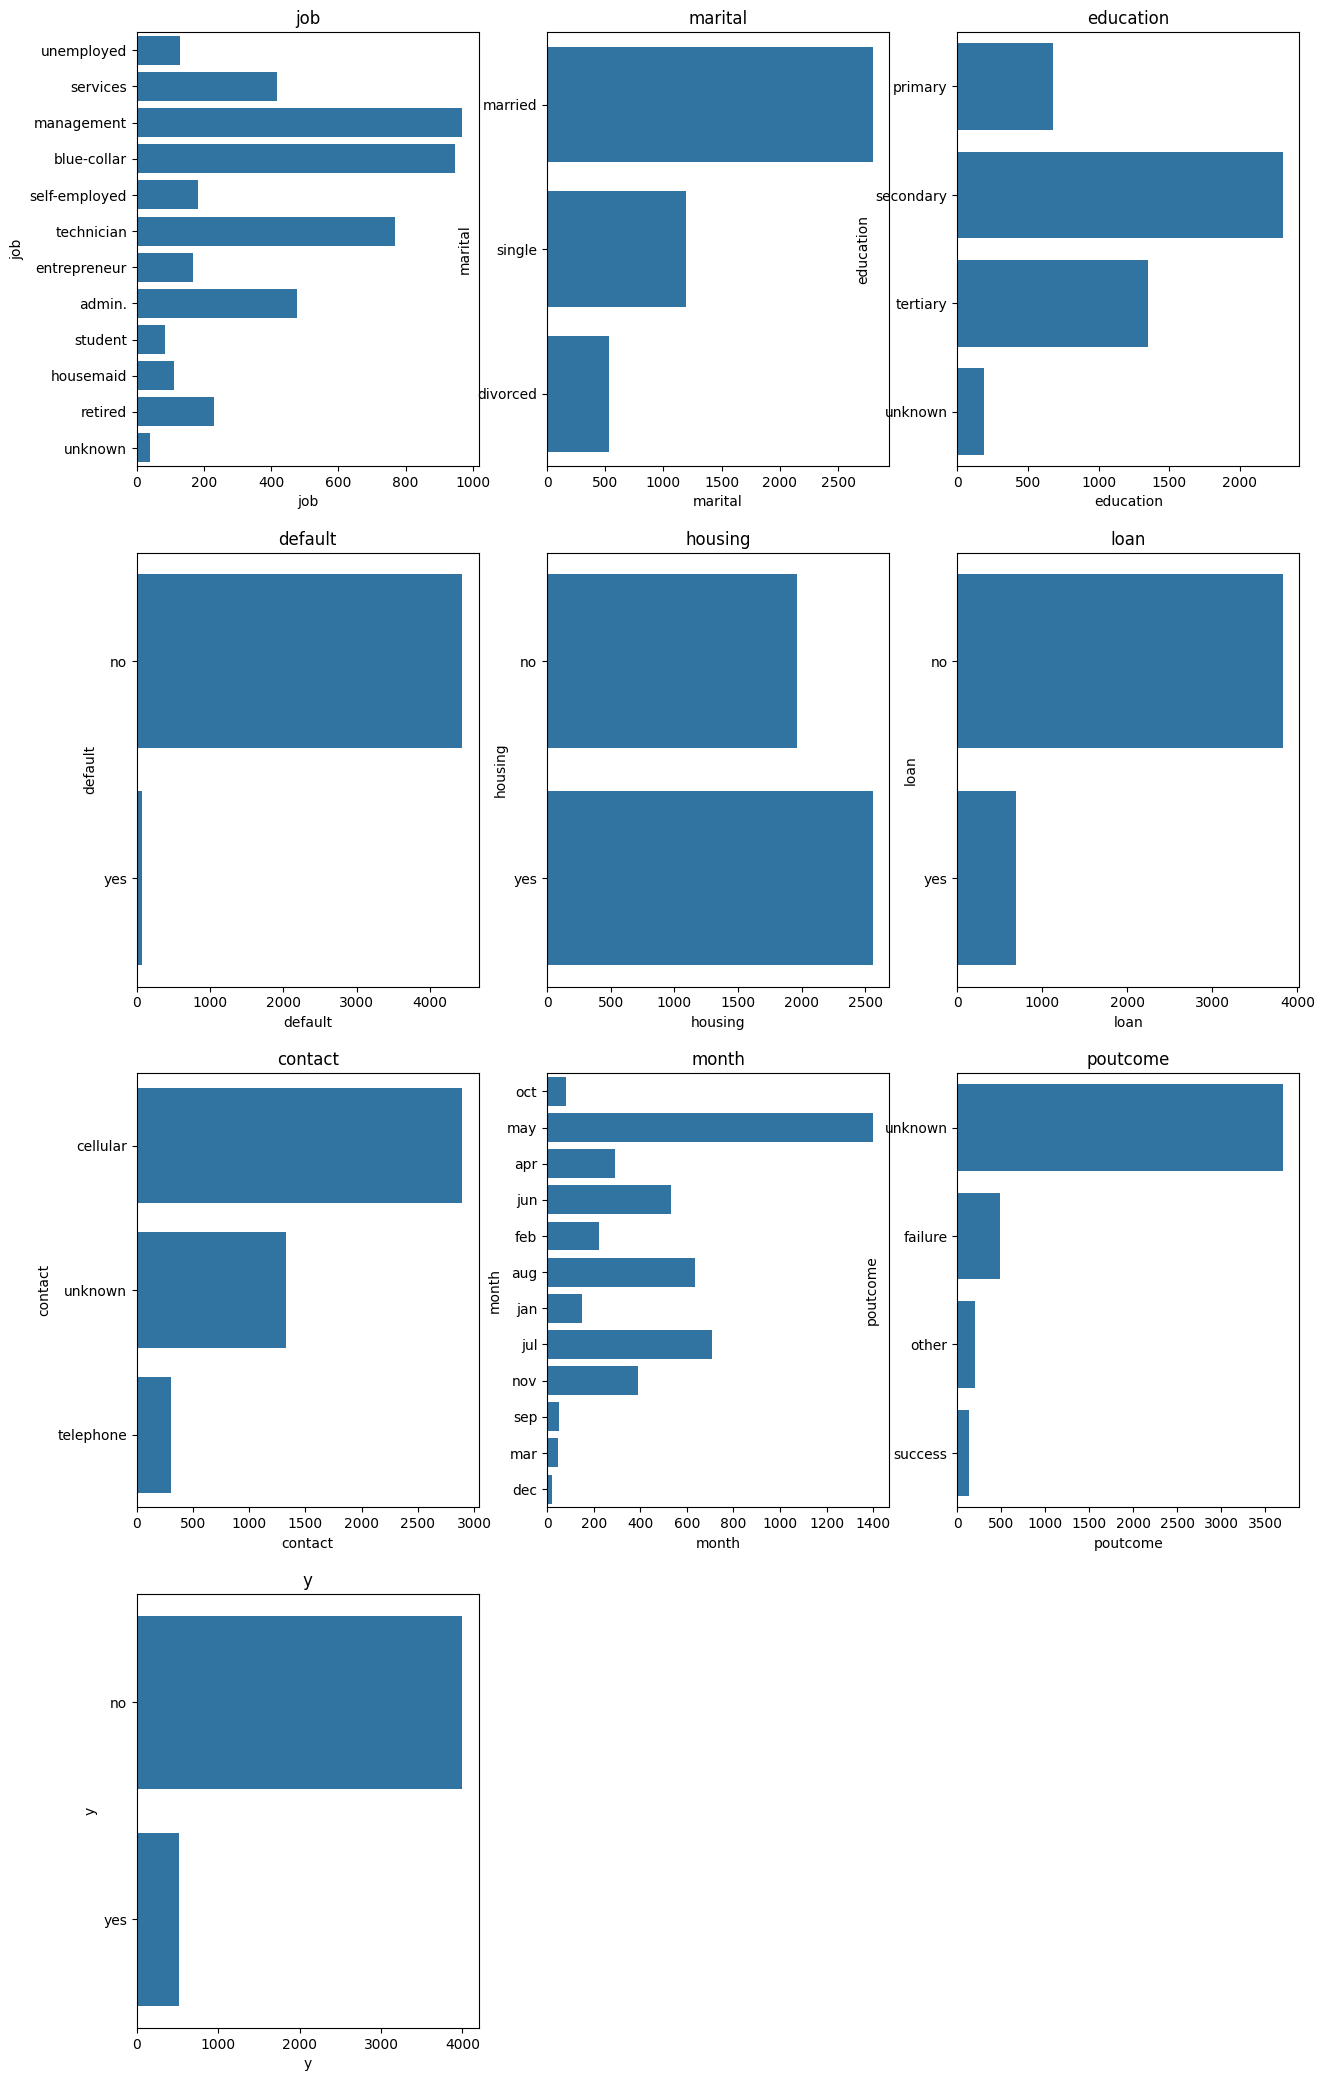

In [33]:
# Display the count of each category for each Feature
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

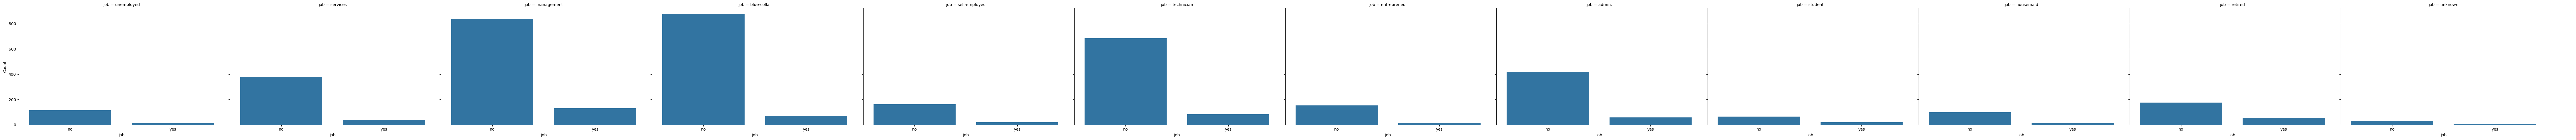

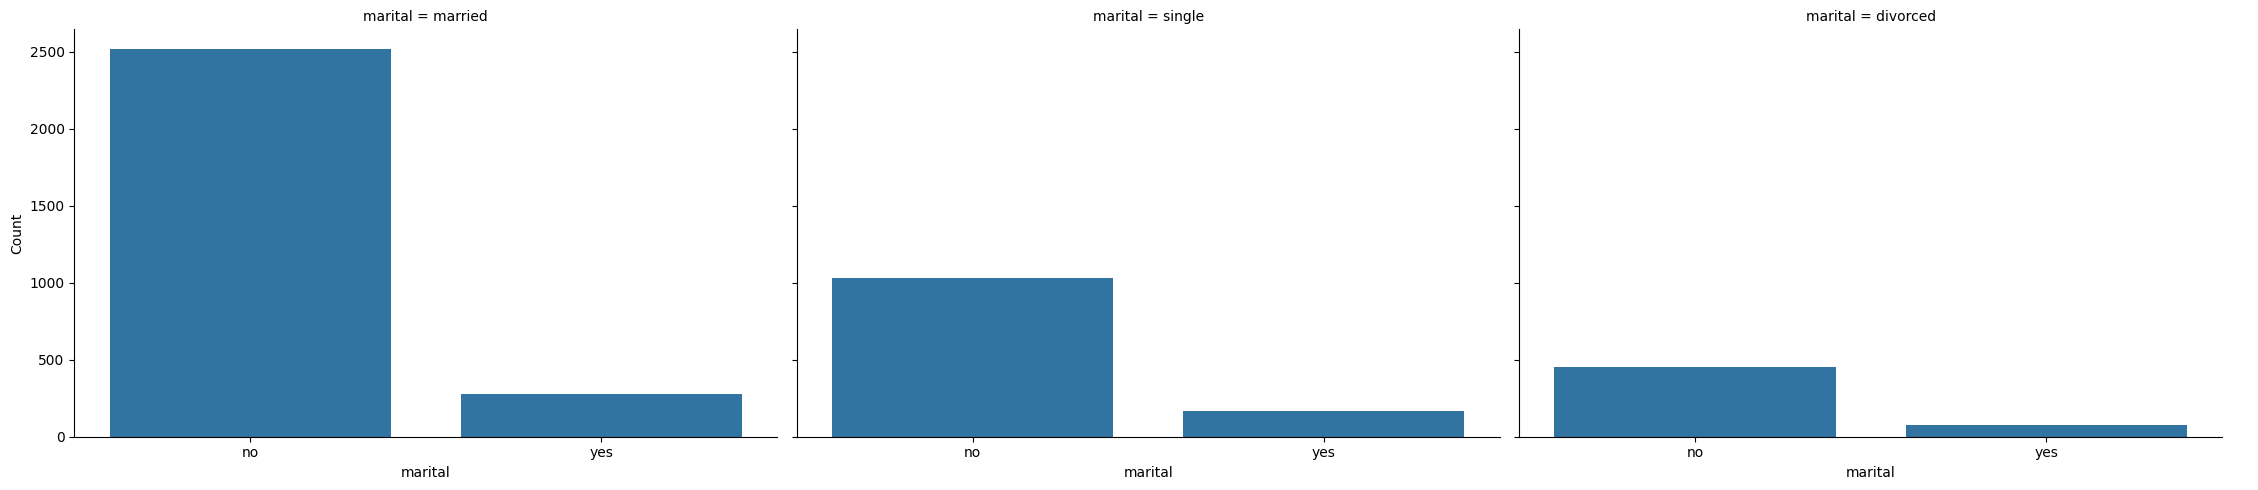

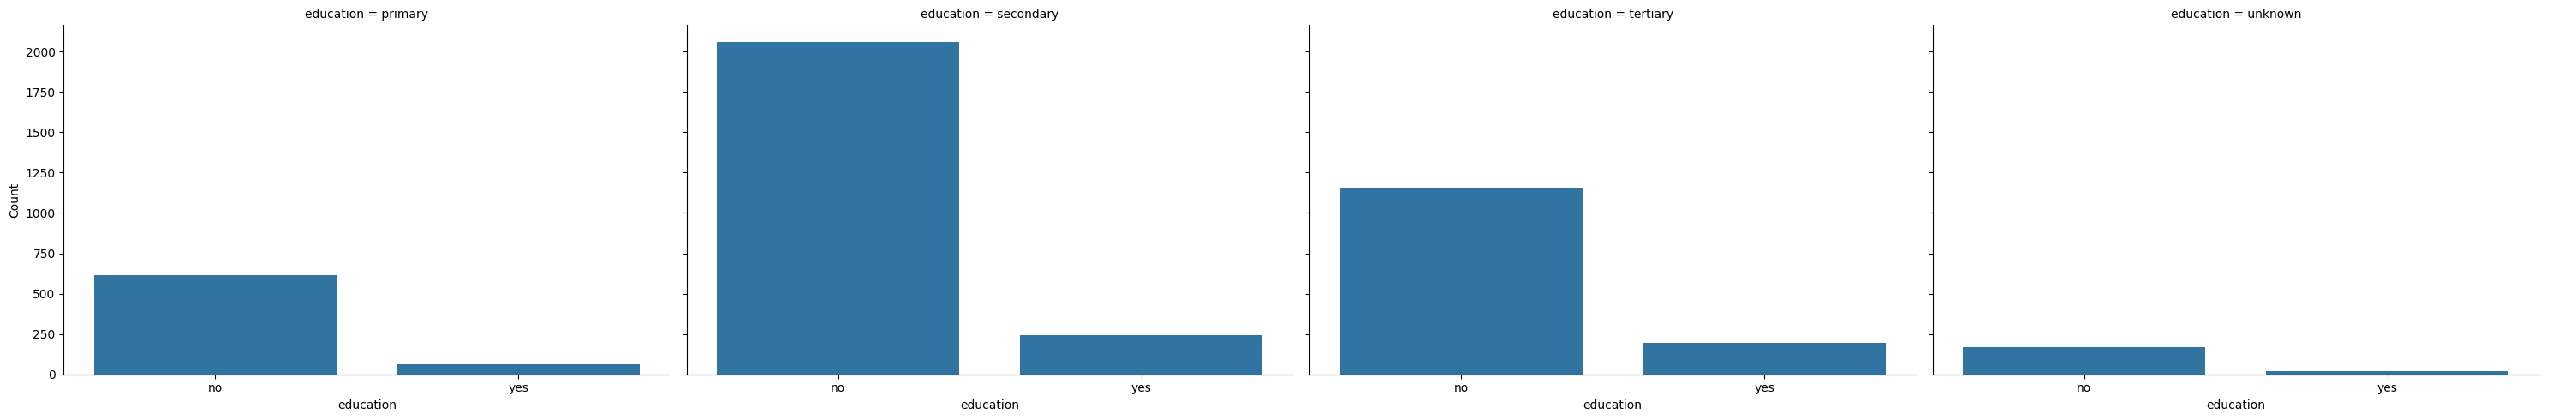

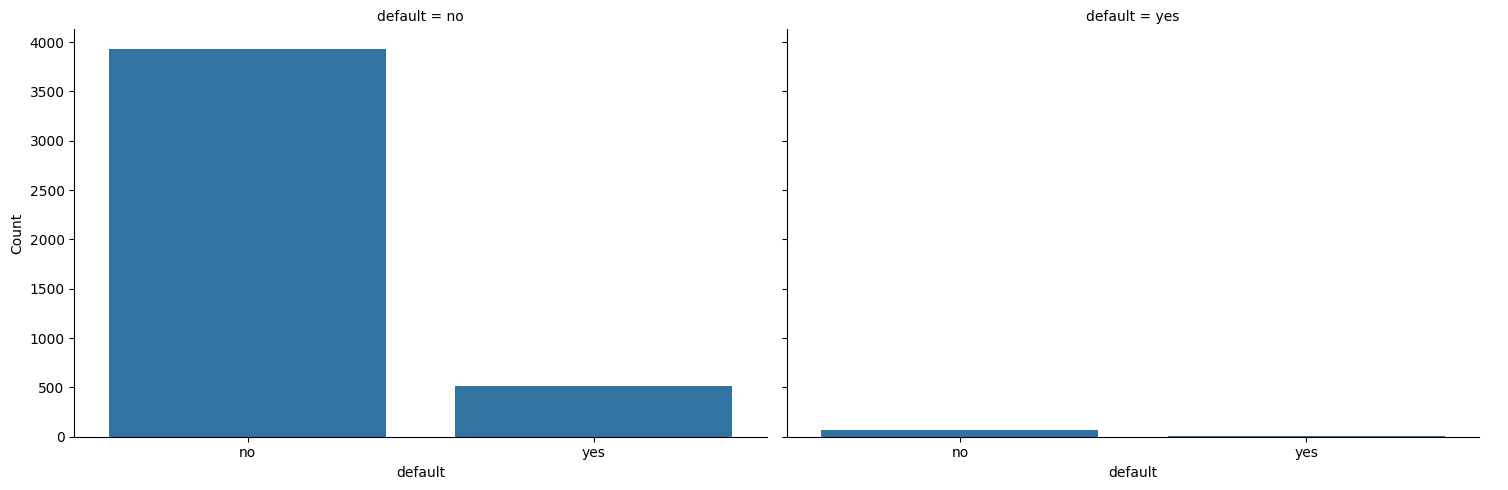

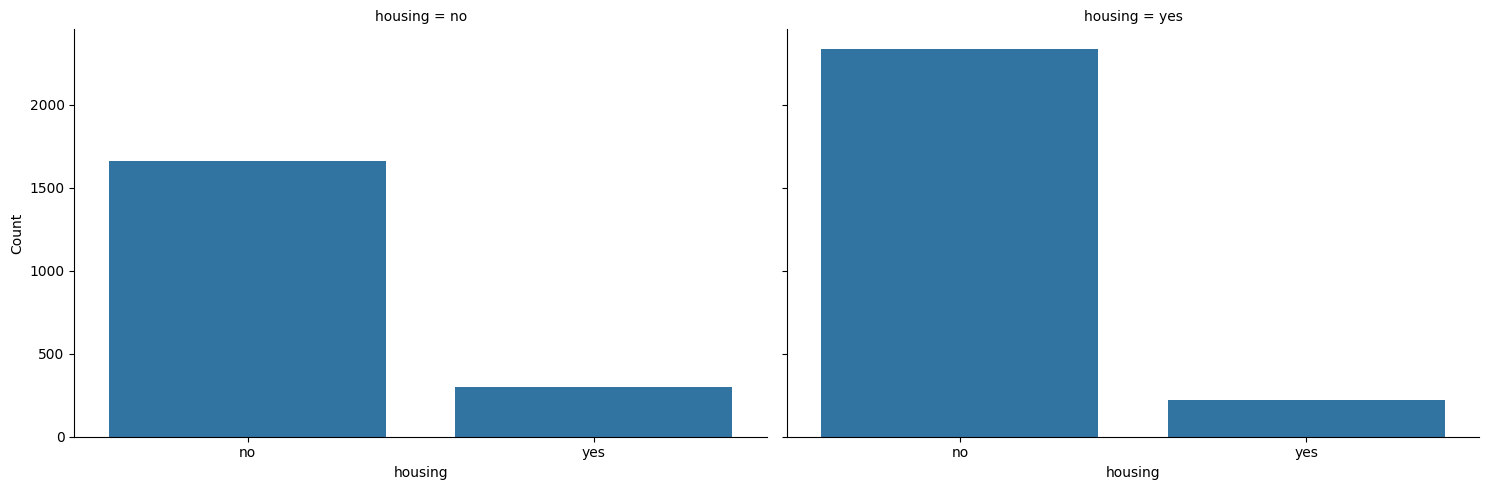

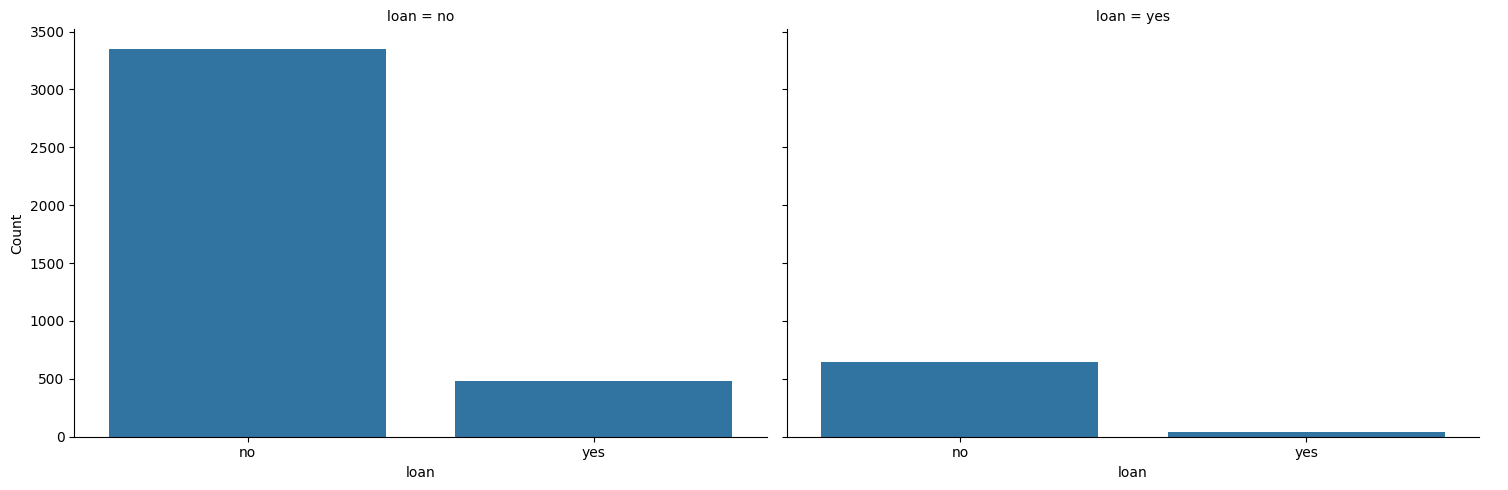

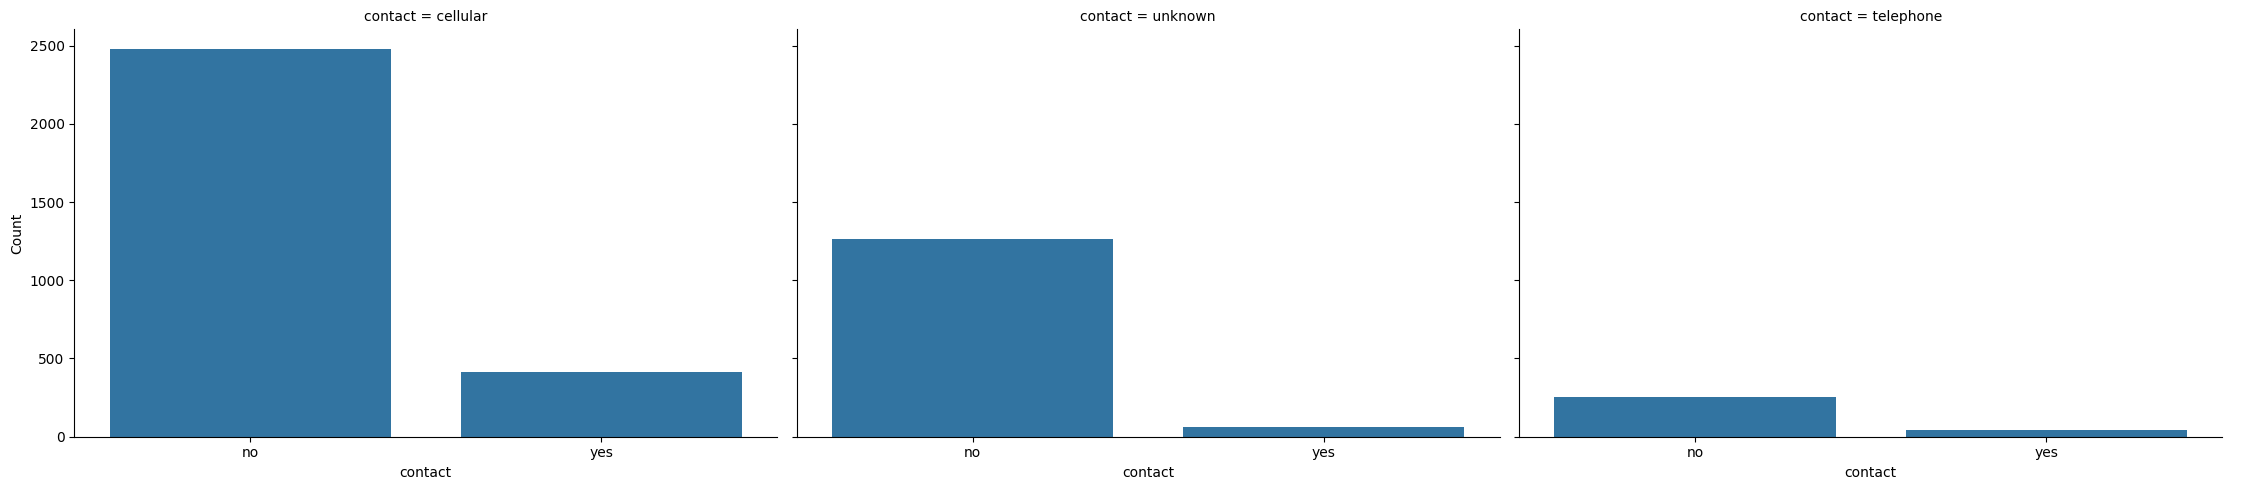

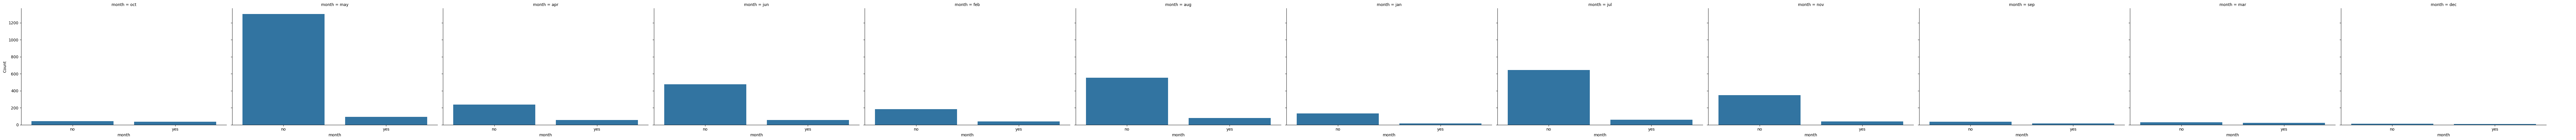

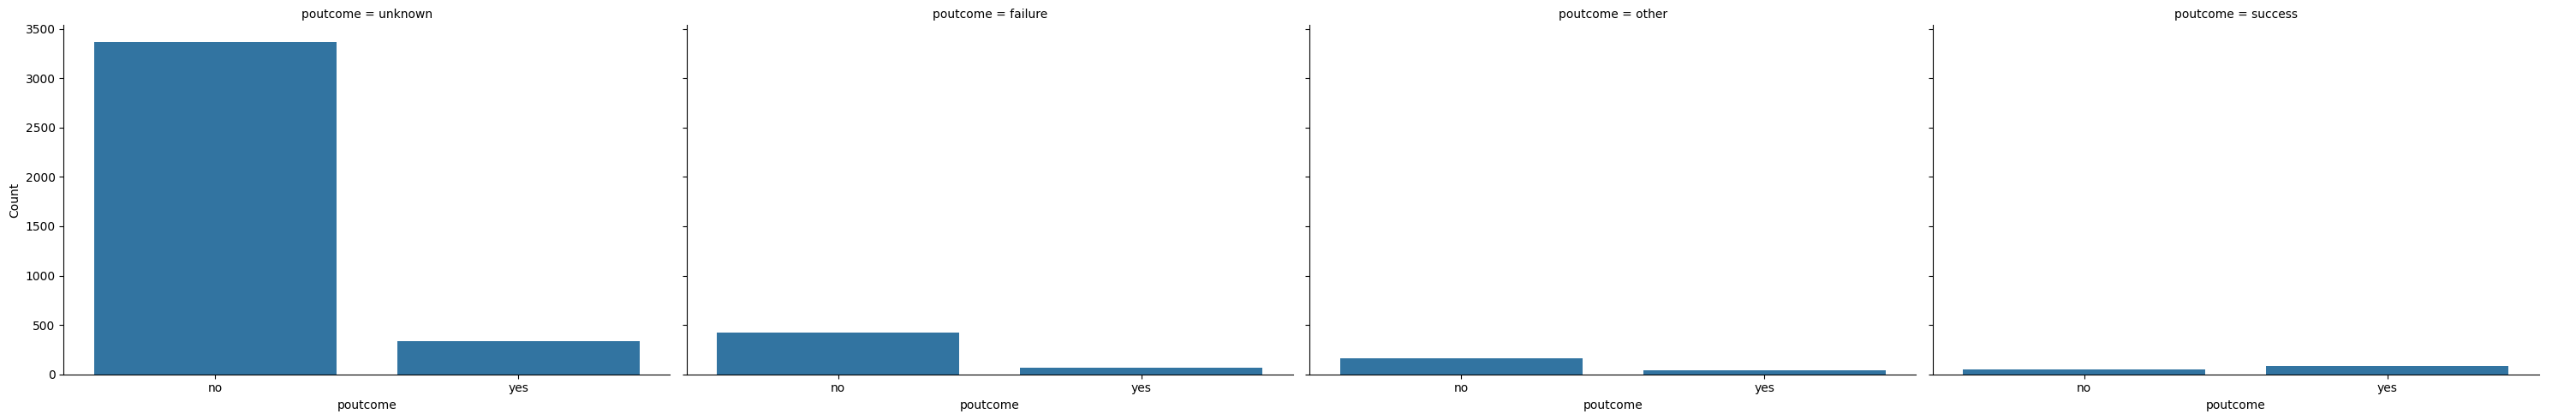

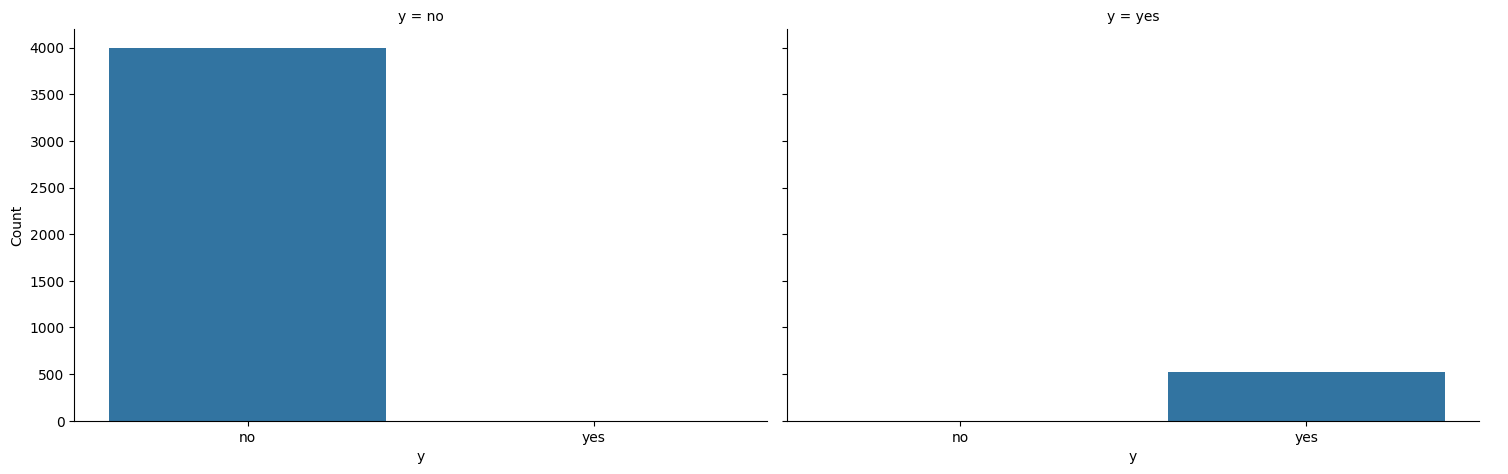

In [34]:
# Perform cross-analysis between the target label 'deposit (y)' and categorical features
# Visualize the relationship by showing the distribution of 'deposit' across each category

for categorical_feature in categorical_features:
    g = sns.catplot(x='y', col=categorical_feature, kind='count', data=df, height=5, aspect=1.5)
    g.set_axis_labels(categorical_feature, 'Count')

plt.subplots_adjust(top=0.9)  


In [35]:
# Display quantiatively the count for each cross-analysis
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           420
     blue-collar      877
     entrepreneur     153
     housemaid         98
     management       838
     retired          176
     self-employed    163
     services         379
     student           65
     technician       685
     unemployed       115
     unknown           31
yes  admin.            58
     blue-collar       69
     entrepreneur      15
     housemaid         14
     management       131
     retired           54
     self-employed     20
     services          38
     student           19
     technician        83
     unemployed        13
     unknown            7
dtype: int64
y    marital 
no   divorced     451
     married     2520
     single      1029
yes  divorced      77
     married      277
     single       167
dtype: int64
y    education
no   primary       614
     secondary    2061
     tertiary     1157
     unknown       168
yes  primary        64
     secondary     245
     tertiary      193
     unkn

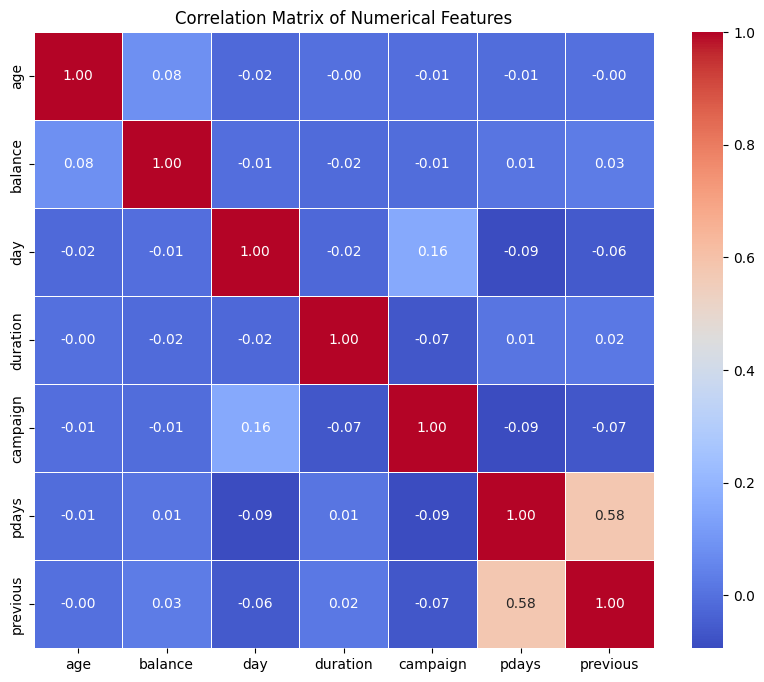

In [36]:
# Select numerical columns
numerical_features = df.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


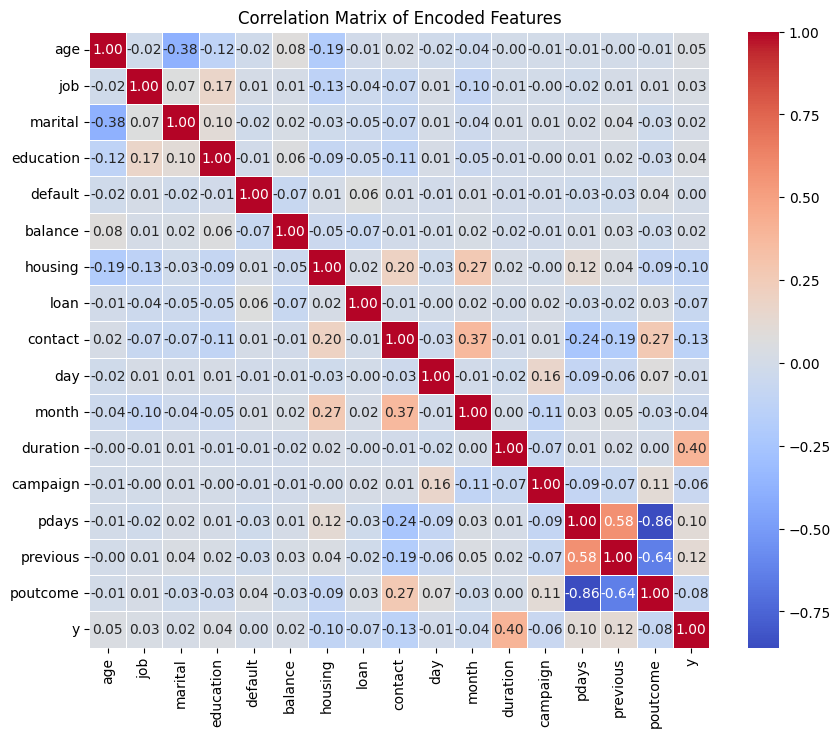

In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns into numeric values
categorical_features = df.select_dtypes(include=[object]).columns
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

correlation_matrix = df.corr()

# Plot the heatmap for the encoded features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Encoded Features')
plt.show()


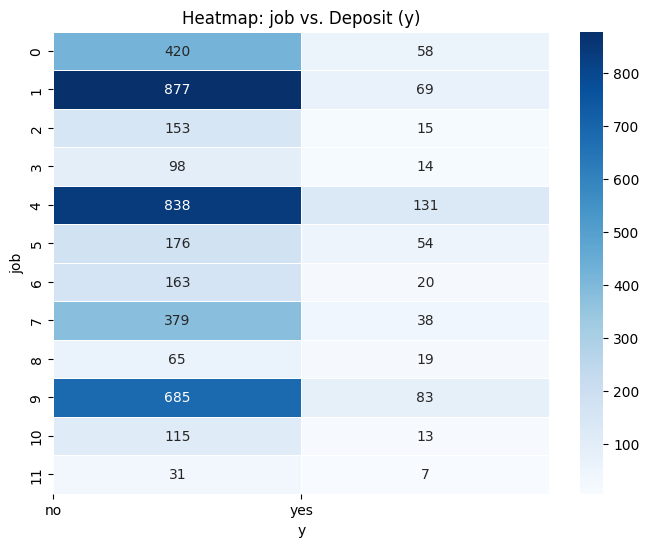

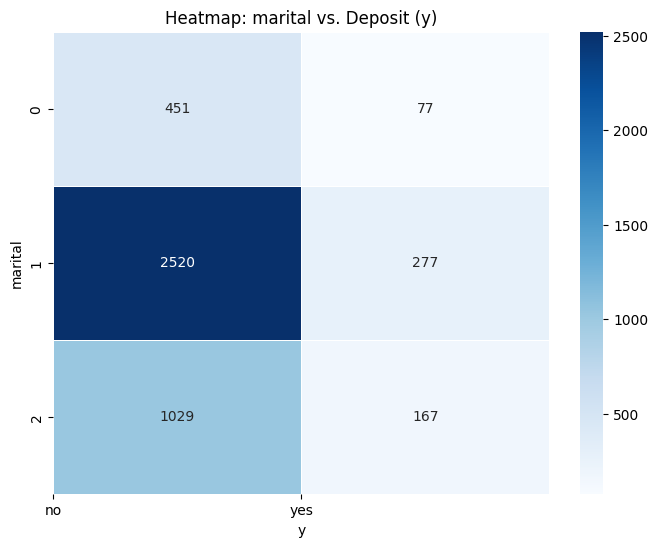

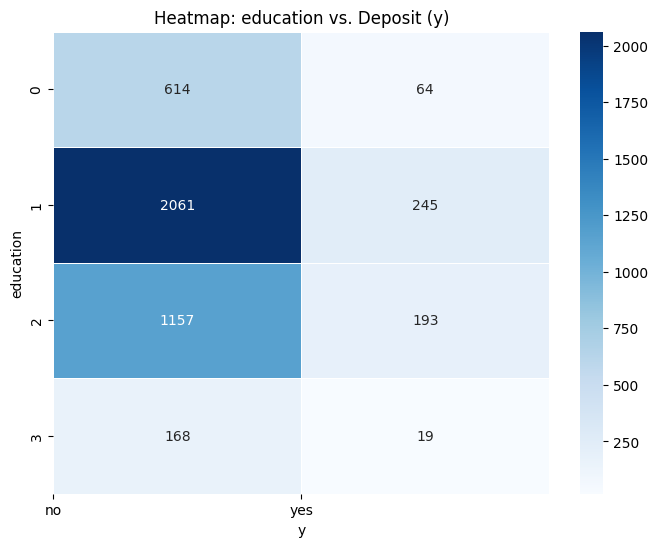

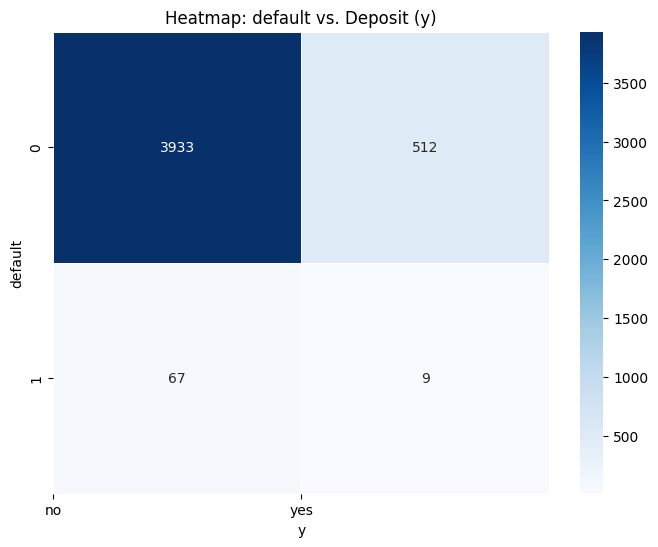

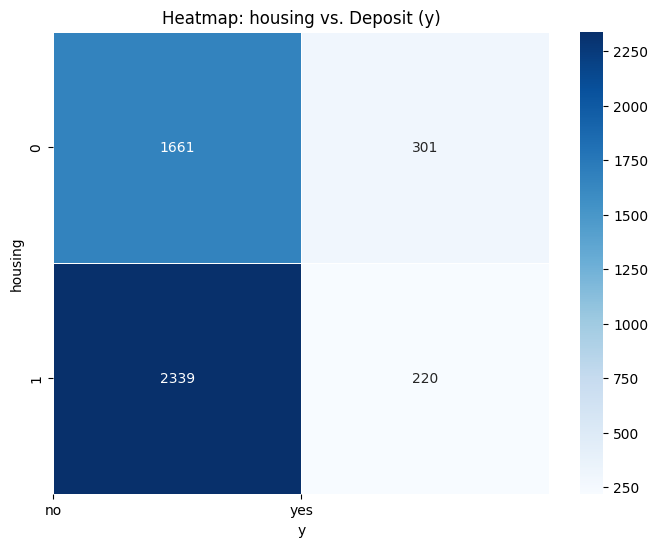

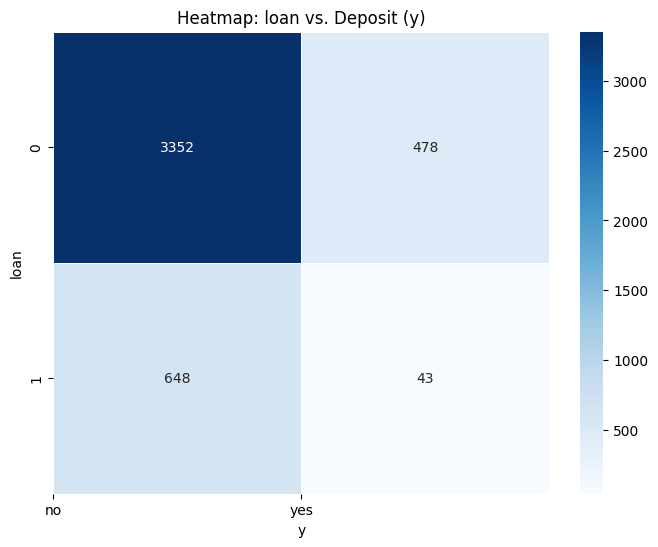

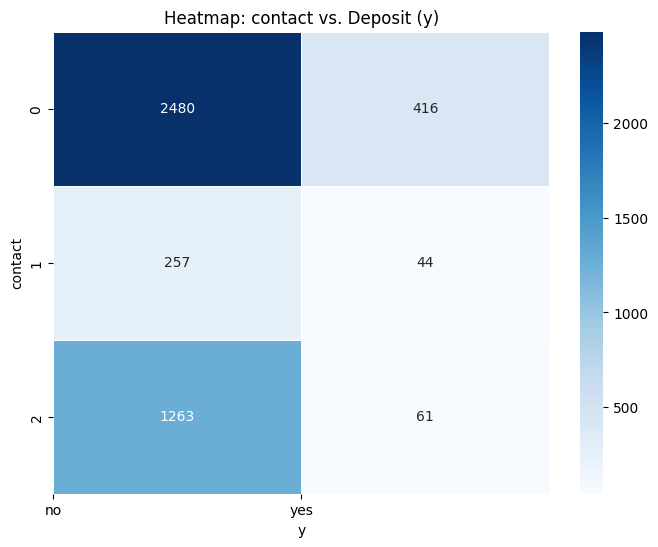

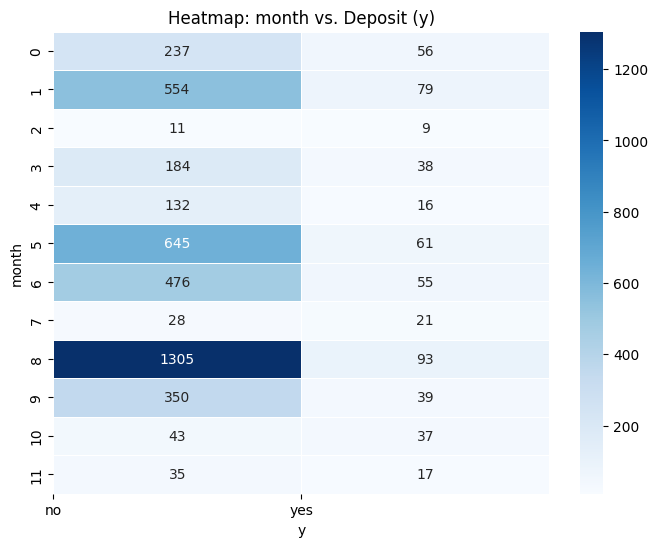

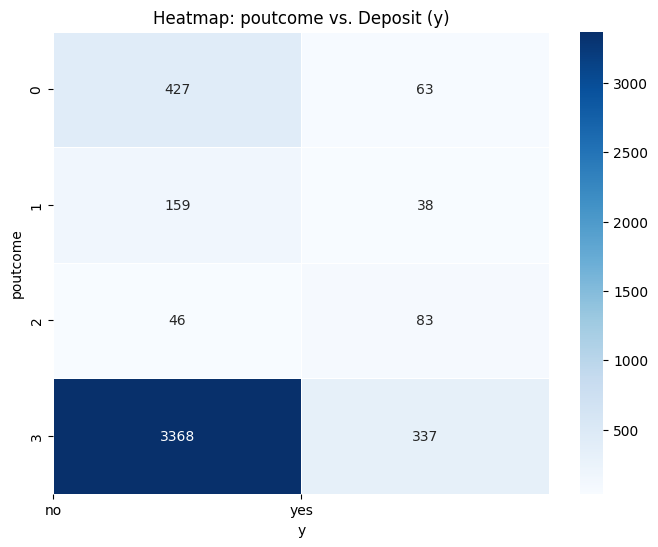

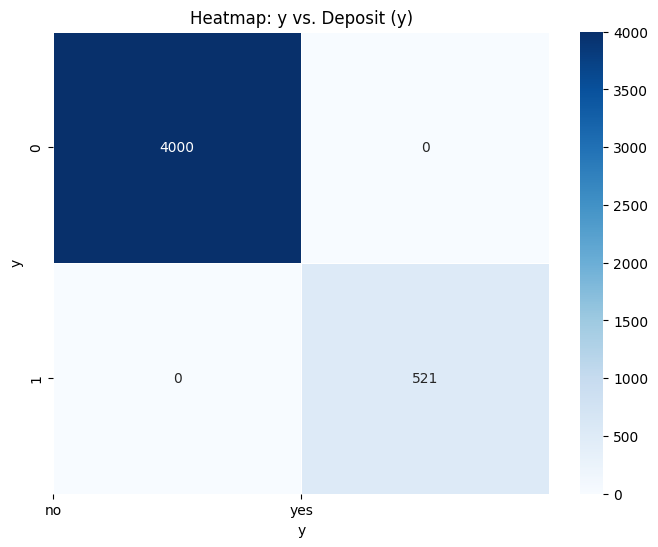

In [38]:
# Cross-tabulation of categorical features with the target variable 'y'
for categorical_feature in categorical_features:
    crosstab = pd.crosstab(df[categorical_feature], df['y'])
    
    # Plot heatmap for each feature's relationship with 'y'
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
    
    # Set x-axis labels to 'no' and 'yes' instead of 0 and 1
    plt.xticks(ticks=[0, 1], labels=['no', 'yes'], rotation=0)
    
    plt.title(f'Heatmap: {categorical_feature} vs. Deposit (y)')
    plt.show()


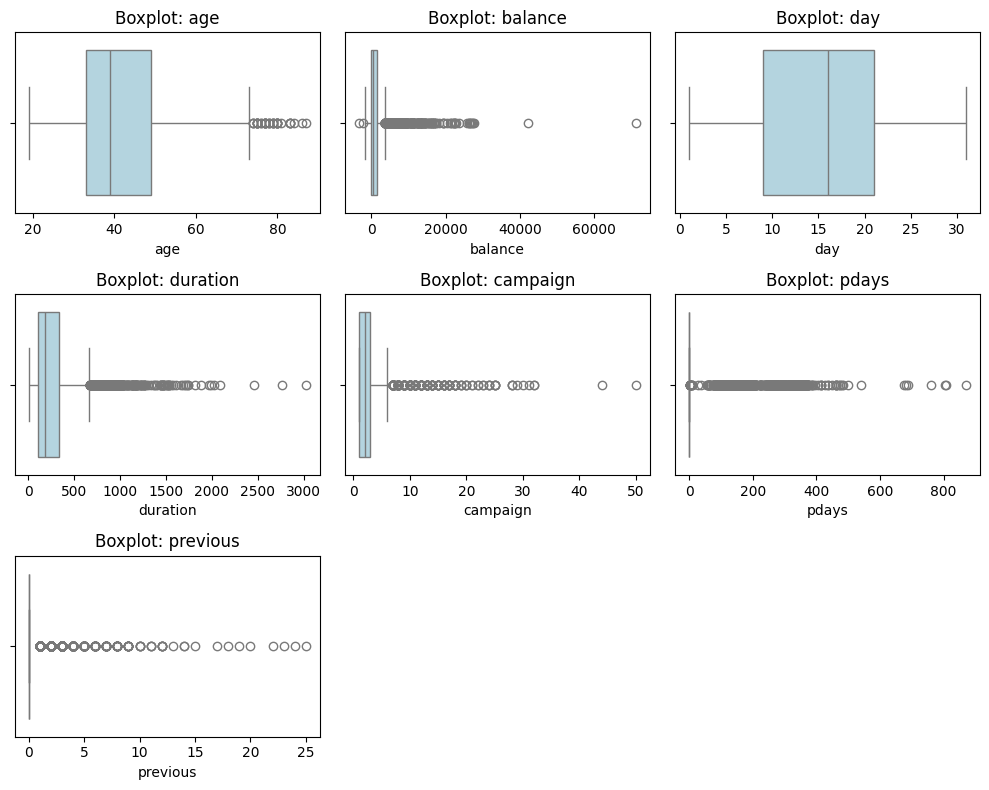

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots
plt.figure(figsize=(10, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i) 
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Boxplot: {feature}')

plt.tight_layout()
plt.show()


DATASET SPLITTING

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target variable (y)
X = df.drop(['y'], axis=1) 
y = df['y']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the lengths of train and test sets
print(f"Length of training set: {len(X_train)}")
print(f"Length of test set: {len(X_test)}")

Length of training set: 3616
Length of test set: 905


RANDOM FOREST CLASSIFIER MODEL TRAINING 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=0)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Print the training score (accuracy)
train_accuracy = rf_model.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")


Training accuracy: 1.0000


LOGiSTIC REGRESSION MODEL TRAINING 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your dataset loaded and preprocessed as `df`
# Split the dataset into features (X) and target variable (y)
X = df.drop(['y'], axis=1)  # Assuming 'y' is the target variable
y = df['y']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=0)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Print the training accuracy
train_accuracy = logreg_model.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

MODEL TESTING

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the models
rf_model = RandomForestClassifier(random_state=0)
logreg_model = LogisticRegression(random_state=0)

# Train the models on the training data (assuming you have already trained them)
rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

# Test the models on the test data and print the accuracy for both
rf_test_accuracy = rf_model.score(X_test, y_test)
logreg_test_accuracy = logreg_model.score(X_test, y_test)

# Print the test accuracy for both models
print(f"Random Forest Test accuracy: {rf_test_accuracy:.4f}")
print(f"Logistic Regression Test accuracy: {logreg_test_accuracy:.4f}")


Random Forest Test accuracy: 0.8939
Logistic Regression Test accuracy: 0.8840


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CLASSIFICATION REPORT

In [68]:
from sklearn.metrics import classification_report

# Generate the classification report for Random Forest
y_pred_rf = rf_model.predict(X_test)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

# Generate the classification report for Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
class_report_logreg = classification_report(y_test, y_pred_logreg)
print("Logistic Regression Classification Report:")
print(class_report_logreg)


Random Forest Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94       793
         yes       0.64      0.33      0.44       112

    accuracy                           0.89       905
   macro avg       0.77      0.65      0.69       905
weighted avg       0.88      0.89      0.88       905

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.98      0.94       793
         yes       0.59      0.21      0.31       112

    accuracy                           0.88       905
   macro avg       0.74      0.60      0.63       905
weighted avg       0.86      0.88      0.86       905



CONFUSION MATRIX

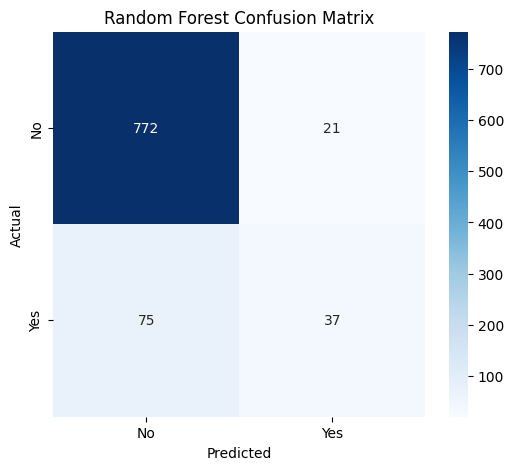

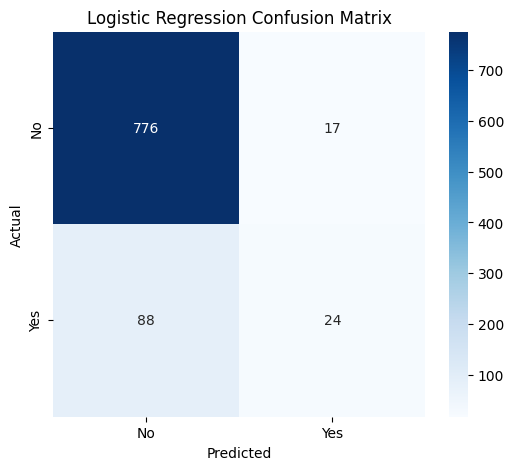

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Generate the confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


AUC-ROC (Receiver Operating Characteristic)

Random Forest AUC-ROC score: 0.9134
Logistic Regression AUC-ROC score: 0.8226


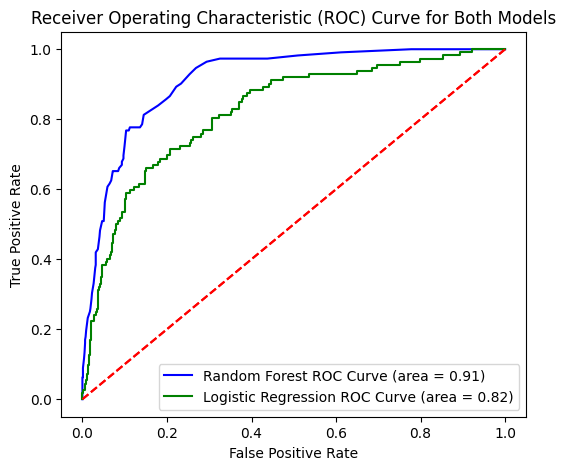

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode the target labels as 0 and 1
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Get the predicted probabilities for the positive class for Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute the AUC score for Random Forest
auc_score_rf = roc_auc_score(y_test_encoded, y_prob_rf)
print(f"Random Forest AUC-ROC score: {auc_score_rf:.4f}")

# Plot the ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_encoded, y_prob_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='b', label='Random Forest ROC Curve (area = %0.2f)' % auc_score_rf)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')

# Get the predicted probabilities for the positive class for Logistic Regression
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Compute the AUC score for Logistic Regression
auc_score_logreg = roc_auc_score(y_test_encoded, y_prob_logreg)
print(f"Logistic Regression AUC-ROC score: {auc_score_logreg:.4f}")

# Plot the ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test_encoded, y_prob_logreg)
plt.plot(fpr_logreg, tpr_logreg, color='g', label='Logistic Regression ROC Curve (area = %0.2f)' % auc_score_logreg)

# Customize the plot
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Both Models')
plt.legend(loc='lower right')
plt.show()
